# Publicis Sapient Data Science Challenge 2019 - 

## Exploratory Data Analysis

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')
submission = pd.read_csv('sample_submission.csv')

# Steps of Analysis and Checks - 

1. Check for duplicate values
2. Check for outliers
3. Check for NaN values
4. Check for the correlation of columns

In [108]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,157876,0,Cash loans,F,N,Y,0,67500.0,343800.0,16155.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,157878,0,Cash loans,M,Y,N,2,247500.0,945000.0,40167.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,157879,0,Revolving loans,M,N,Y,2,180000.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,157880,0,Cash loans,F,N,Y,0,112500.0,295168.5,16011.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,157881,0,Cash loans,F,N,Y,0,63000.0,298512.0,17266.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
for col in df.columns:
    print(col)
    print(df[col].count())
    print(len(df[col].unique()))
    print('\n')

SK_ID_CURR
257512
257512


TARGET
257512
2


NAME_CONTRACT_TYPE
257512
2


CODE_GENDER
257512
3


FLAG_OWN_CAR
257512
2


FLAG_OWN_REALTY
257512
2


CNT_CHILDREN
257512
14


AMT_INCOME_TOTAL
257512
2225


AMT_CREDIT
257512
5315


AMT_ANNUITY
257501
13238


AMT_GOODS_PRICE
257272
912


NAME_TYPE_SUITE
256412
8


NAME_INCOME_TYPE
257512
8


NAME_EDUCATION_TYPE
257512
5


NAME_FAMILY_STATUS
257512
6


NAME_HOUSING_TYPE
257512
6


REGION_POPULATION_RELATIVE
257512
81


DAYS_BIRTH
257512
17435


DAYS_EMPLOYED
257512
12196


DAYS_REGISTRATION
257512
15477


DAYS_ID_PUBLISH
257512
6145


OWN_CAR_AGE
87533
63


FLAG_MOBIL
257512
1


FLAG_EMP_PHONE
257512
2


FLAG_WORK_PHONE
257512
2


FLAG_CONT_MOBILE
257512
2


FLAG_PHONE
257512
2


FLAG_EMAIL
257512
2


OCCUPATION_TYPE
176775
19


CNT_FAM_MEMBERS
257511
17


REGION_RATING_CLIENT
257512
3


REGION_RATING_CLIENT_W_CITY
257512
3


WEEKDAY_APPR_PROCESS_START
257512
7


HOUR_APPR_PROCESS_START
257512
24


REG_REGION_NOT_LIVE_REGION
257512
2


REG

# Handling Duplicate Values

In [110]:
len(df)/len(df.drop_duplicates()) # No duplicate values ensured as rows

1.0

In [111]:
len(df)/len(df['SK_ID_CURR'].unique()) # All unique SK_ID's

1.0

# Pre Processing Steps

1. Convert Real Binary variables to 0/1 for example FLAG_OWN_CAR , FLAG_OWN_REALITY e.t.c
2. Remove SK_ID_CURR as it wont help in any analysis
3. 

In [112]:
df.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [113]:
cols_to_encode = []
for col in df.columns:
    if len(df[col].unique())<=3:
        if df[col].dtype=='O':
            cols_to_encode.append(col)
        
        print(df[col].unique())
        print("{} : {} : {} ".format(col , len(df[col].unique()) , df[col].dtype ))
        
cols_to_encode

[0 1]
TARGET : 2 : int64 
['Cash loans' 'Revolving loans']
NAME_CONTRACT_TYPE : 2 : object 
['F' 'M' 'XNA']
CODE_GENDER : 3 : object 
['N' 'Y']
FLAG_OWN_CAR : 2 : object 
['Y' 'N']
FLAG_OWN_REALTY : 2 : object 
[1]
FLAG_MOBIL : 1 : int64 
[1 0]
FLAG_EMP_PHONE : 2 : int64 
[1 0]
FLAG_WORK_PHONE : 2 : int64 
[1 0]
FLAG_CONT_MOBILE : 2 : int64 
[1 0]
FLAG_PHONE : 2 : int64 
[0 1]
FLAG_EMAIL : 2 : int64 
[2 3 1]
REGION_RATING_CLIENT : 3 : int64 
[2 3 1]
REGION_RATING_CLIENT_W_CITY : 3 : int64 
[0 1]
REG_REGION_NOT_LIVE_REGION : 2 : int64 
[0 1]
REG_REGION_NOT_WORK_REGION : 2 : int64 
[0 1]
LIVE_REGION_NOT_WORK_REGION : 2 : int64 
[1 0]
REG_CITY_NOT_LIVE_CITY : 2 : int64 
[1 0]
REG_CITY_NOT_WORK_CITY : 2 : int64 
[0 1]
LIVE_CITY_NOT_WORK_CITY : 2 : int64 
[nan 'No' 'Yes']
EMERGENCYSTATE_MODE : 3 : object 
[0 1]
FLAG_DOCUMENT_2 : 2 : int64 
[1 0]
FLAG_DOCUMENT_3 : 2 : int64 
[0 1]
FLAG_DOCUMENT_4 : 2 : int64 
[0 1]
FLAG_DOCUMENT_5 : 2 : int64 
[0 1]
FLAG_DOCUMENT_6 : 2 : int64 
[0 1]
FLAG_DO

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [114]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
le = LabelEncoder()

for col in tqdm(cols_to_encode):
    df[col] = le.fit_transform(df[col].astype(str))
    

100%|██████████| 5/5 [00:00<00:00, 14.51it/s]


In [115]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,157876,0,0,0,0,1,0,67500.0,343800.0,16155.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,157878,0,0,1,1,0,2,247500.0,945000.0,40167.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,157879,0,1,1,0,1,2,180000.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,157880,0,0,0,0,1,0,112500.0,295168.5,16011.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,157881,0,0,0,0,1,0,63000.0,298512.0,17266.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257512 entries, 0 to 257511
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(47), object(11)
memory usage: 239.7+ MB


In [117]:
object_dtype_cols = []

for col in df.columns:
    if df[col].dtype=='O':
        object_dtype_cols.append(col)

In [118]:
object_dtype_cols

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [119]:
df = pd.get_dummies(df , prefix_sep = '_' , dummy_na = True , columns = object_dtype_cols )

In [120]:
single_value_cols = []

for col in df.columns:
    if len(df[col].unique()) ==1:
        single_value_cols.append(col)

In [121]:
single_value_cols

['FLAG_MOBIL',
 'NAME_INCOME_TYPE_nan',
 'NAME_EDUCATION_TYPE_nan',
 'NAME_FAMILY_STATUS_nan',
 'NAME_HOUSING_TYPE_nan',
 'WEEKDAY_APPR_PROCESS_START_nan',
 'ORGANIZATION_TYPE_nan']

In [122]:
#for col in single_value_cols:
#    df.drop(columns = col , inplace = True)
    
df.drop(columns = 'SK_ID_CURR' , inplace = True)

In [123]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_nan,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan
0,0,0,0,0,1,0,67500.0,343800.0,16155.0,225000.0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,1,0,2,247500.0,945000.0,40167.0,945000.0,...,0,1,0,0,0,0,0,0,0,1
2,0,1,1,0,1,2,180000.0,540000.0,27000.0,540000.0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,112500.0,295168.5,16011.0,238500.0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,63000.0,298512.0,17266.5,270000.0,...,0,1,0,0,0,0,0,0,0,1


In [124]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('\n')

TARGET
[0 1]


NAME_CONTRACT_TYPE
[0 1]


CODE_GENDER
[0 1 2]


FLAG_OWN_CAR
[0 1]


FLAG_OWN_REALTY
[1 0]


CNT_CHILDREN
[ 0  2  1  3  4  5  6 12  7 10  8 19 14  9]


AMT_INCOME_TOTAL
[ 67500.  247500.  180000.  ...  96768.  546250.5 113062.5]


AMT_CREDIT
[ 343800.   945000.   540000.  ...  181989.   743863.5 1391130. ]


AMT_ANNUITY
[16155.  40167.  27000.  ... 71986.5 58770.  77809.5]


AMT_GOODS_PRICE
[ 225000.   945000.   540000.   238500.   270000.   450000.   247500.
  441000.   900000.   522000.   675000.   166500.   472500.   315000.
 1125000.   157500.   850500.   810000.   747000.  1350000.   360000.
 1800000.   679500.   990000.   805500.   904500.   576000.   495000.
  616500.   256500.   337500.   630000.   454500.  1305000.  1395000.
  328500.   112500.   931500.  2250000.   243000.   342000.   486000.
  234000.   405000.   252000.    90000.   135000.   391500.   378000.
   63000.  1035000.   688500.   202500.  1530000.    67500.   229500.
  162000.   414000.   382500. 

[   nan 0.0693 0.0126 0.0168 0.084  0.0567 0.063  0.0084 0.0053 0.1418
 0.1712 0.0284 0.083  0.3834 0.0557 0.4265 0.416  0.2017 0.188  0.1523
 0.0525 0.0945 0.1355 0.0504 0.0189 0.1996 0.2899 0.1334 0.3025 0.0462
 0.1765 0.1261 0.0473 0.1891 0.0819 0.2248 0.0294 0.0788 0.0882 0.1481
 0.0231 0.1691 0.3403 0.1124 0.0672 0.3739 0.0704 0.0609 0.0378 0.
 0.0735 0.1345 0.0588 0.2111 0.0042 0.1366 0.1702 0.042  0.0798 0.2458
 0.2279 0.1134 0.2395 0.0935 0.0924 0.1218 0.125  0.062  0.1513 0.0651
 0.0441 0.4118 0.2269 0.1019 0.105  0.0578 0.0347 0.0315 0.1229 0.2426
 0.3782 0.0021 0.2258 0.0389 0.1828 0.0756 0.0116 0.0767 0.0368 0.2101
 0.1502 0.0515 0.0903 0.0725 0.2468 0.1681 0.4548 0.1376 0.167  0.1103
 0.0032 0.0683 0.0326 0.3866 0.1639 0.479  0.1197 0.0641 0.0063 0.1313
 0.0998 0.0599 0.0263 0.1239 0.1113 0.3078 0.1208 0.4527 0.4023 0.0851
 0.1387 0.2805 0.4181 0.2174 0.1586 0.2952 0.0746 0.1607 0.1071 0.0252
 0.208  0.0714 0.1723 0.3088 0.2206 0.2489 0.4412 0.0095 0.0872 0.2363
 0.6008 0.

[ 0. nan  1.  2.  5.  4.  3.  9.  8.  6.]


AMT_REQ_CREDIT_BUREAU_WEEK
[ 0. nan  1.  3.  2.  4.  6.  5.  8.  7.]


AMT_REQ_CREDIT_BUREAU_MON
[ 0. nan  1.  2.  3.  5. 11.  6.  8.  4. 10.  7. 14.  9. 13. 12. 15. 16.
 23. 18. 17. 19. 27. 22.]


AMT_REQ_CREDIT_BUREAU_QRT
[  0.   1.  nan   2.   3.   5.   4.   6.   8.   7. 261.  19.]


AMT_REQ_CREDIT_BUREAU_YEAR
[ 1.  2.  3. nan  0.  4.  5.  7.  8.  6.  9. 12. 14. 10. 16. 13. 11. 22.
 17. 19. 18. 21. 15. 20.]


NAME_TYPE_SUITE_Children
[0 1]


NAME_TYPE_SUITE_Family
[0 1]


NAME_TYPE_SUITE_Group of people
[0 1]


NAME_TYPE_SUITE_Other_A
[0 1]


NAME_TYPE_SUITE_Other_B
[0 1]


NAME_TYPE_SUITE_Spouse, partner
[0 1]


NAME_TYPE_SUITE_Unaccompanied
[1 0]


NAME_TYPE_SUITE_nan
[0 1]


NAME_INCOME_TYPE_Businessman
[0 1]


NAME_INCOME_TYPE_Commercial associate
[0 1]


NAME_INCOME_TYPE_Maternity leave
[0 1]


NAME_INCOME_TYPE_Pensioner
[0 1]


NAME_INCOME_TYPE_State servant
[1 0]


NAME_INCOME_TYPE_Student
[0 1]


NAME_INCOME_TYPE_Unemployed
[0 1]



# Based on Above Analysis of the Data - 

### Remove Outliers from CNT_CHILDREN and CNT_FAM_MEMEBERS , double check for correlation before removing and observe distribution of values

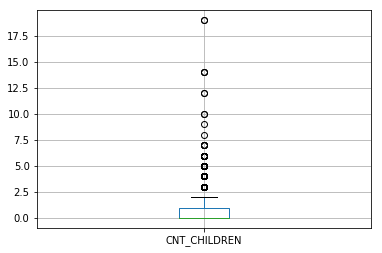

In [125]:
df.boxplot(column = 'CNT_CHILDREN')

In [126]:
df['CNT_CHILDREN'].value_counts(normalize = True)

0     0.700763
1     0.198352
2     0.087103
3     0.012003
4     0.001382
5     0.000276
6     0.000058
7     0.000019
14    0.000012
19    0.000008
12    0.000008
10    0.000008
9     0.000004
8     0.000004
Name: CNT_CHILDREN, dtype: float64

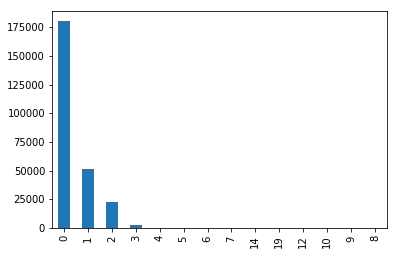

In [127]:
df['CNT_CHILDREN'].value_counts().plot( kind = 'bar') # highly skewed Distribution

In [128]:
df['CNT_CHILDREN'].corr(df['TARGET']) # Not very significant

0.01779196923336253

In [129]:
# Removing all the outliers by simply replacing children count as 3 for all the id's with count greater than 3

df['CNT_CHILDREN'] = df['CNT_CHILDREN'].apply(lambda x : 3 if x>=3 else x)

In [130]:
df['CNT_CHILDREN'].value_counts(normalize = True)

0    0.700763
1    0.198352
2    0.087103
3    0.013782
Name: CNT_CHILDREN, dtype: float64

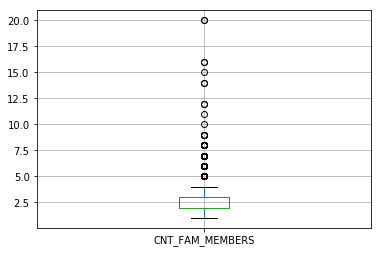

In [131]:
# Applying the same for Family member count - 

df.boxplot(column = 'CNT_FAM_MEMBERS')

In [132]:
df['CNT_FAM_MEMBERS'].value_counts(normalize = True)

2.0     0.514735
1.0     0.221249
3.0     0.170734
4.0     0.080373
5.0     0.011207
6.0     0.001320
7.0     0.000268
8.0     0.000054
9.0     0.000016
12.0    0.000008
16.0    0.000008
20.0    0.000008
14.0    0.000008
15.0    0.000004
11.0    0.000004
10.0    0.000004
Name: CNT_FAM_MEMBERS, dtype: float64

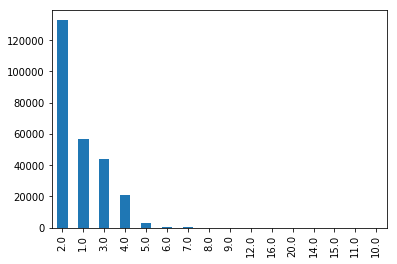

In [133]:
df['CNT_FAM_MEMBERS'].value_counts().plot( kind = 'bar') # highly skewed Distribution

In [134]:
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].apply(lambda x : 6 if x>6 else x)

In [135]:
df['CNT_FAM_MEMBERS'].value_counts(normalize = True)

2.0    0.514735
1.0    0.221249
3.0    0.170734
4.0    0.080373
5.0    0.011207
6.0    0.001701
Name: CNT_FAM_MEMBERS, dtype: float64

In [136]:
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mode()[0] , inplace = True)

## Creating Categorical Bars ( Buckets for each range of values ) in the columns - 

#### AMT_INCOME_TOTAL
#### AMT_CREDIT
#### AMT_ANNUITY
#### AMT_GOODS_PRICE


In [137]:
# Based on quantiles create 10 buckets.
# higher the bucket number,higher the value,so it can be used by the model


cols = ['AMT_INCOME_TOTAL' , 'AMT_CREDIT' , 'AMT_ANNUITY' , 'AMT_GOODS_PRICE' ]


for col in tqdm(cols):
    total = 0.0
    while(total<=0.9):
        quant1 = df[col].quantile(total)
        quant2 = df[col].quantile(total+0.1)
        df[col] = df[col].apply(lambda x : total*10+1 if (x>=quant1 and x<quant2) else x)
        total+=.1

100%|██████████| 4/4 [00:03<00:00,  1.00s/it]


In [138]:
df[cols[1]].value_counts()

2.0          28866
9.0          28675
3.0          26654
7.0          26019
5.0          25833
10.0         25783
4.0          25688
6.0          25530
8.0          22797
1.0          21661
4050000.0        6
Name: AMT_CREDIT, dtype: int64

In [139]:
for col in cols:
    df[col] = df[col].apply(lambda x : 10.0 if x>10 else x)

In [140]:
# thus the above columns have been processed and their values have a logical meaning

# Handling Columns - 

### DAYS_BIRTH , DAYS_EMPLOYED , DAYS_REGISTRATION , DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE

### Remove Null values from , OWN_CAR_AGE 

In [141]:
# df[pd.isna(df['DAYS_BIRTH'])] 0 rows

cols = ['DAYS_BIRTH' , 'DAYS_EMPLOYED' , 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
for col in cols:
    df[col]  = df[col].apply(lambda x : x*-1)
# Removing the - sign from the start and then grouping these values based on age ( years or Age Group ) 

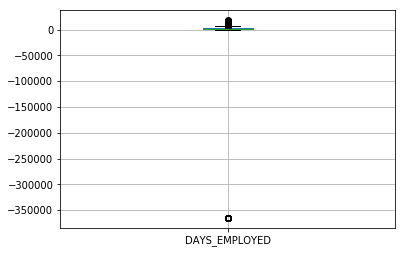

In [142]:
# checking for new results we plot the boxplots of each , observed - 
df.boxplot(column = 'DAYS_EMPLOYED')
#Removing all values < 0 as days employed cant be negative,this is garbage value

In [143]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x : 0 if x<0 else x)

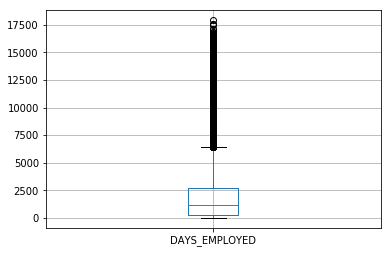

In [144]:
df.boxplot(column = 'DAYS_EMPLOYED')

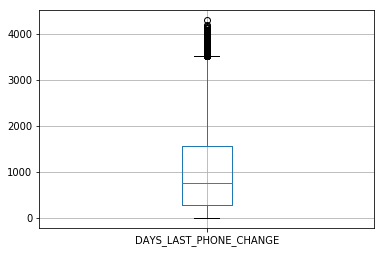

In [145]:
df.boxplot(column = cols[4])

In [146]:
# Removing extreme outliers only for columns that have some reasonable explanation to not have outliers - 
# DAYS_REGISTRATION only, others can have those extremely high values

# Not removing Outliers from DAYS_EMPLOYED as it had a max value that converted to 47 years which is reasonable

cols_treat_outliers = ['DAYS_REGISTRATION']

for col in tqdm(cols_treat_outliers):
    lower = df[col].quantile(0.1) # Removing only the absolutely faulty values 
    upper = df[col].quantile(0.9)
    
    df[col] = df[col].apply(lambda x : lower if x<lower else x)
    df[col] = df[col].apply(lambda x : upper if x>upper else x)
    


100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


In [147]:
cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

# Converting days to Years

In [148]:
for col in cols: # Consider Converting to some other form such as months or quarters , and observe difference
    df[col] = df[col].apply(lambda x : int(x/365))

# Handling OWN_CAR_AGE Outliers and Null values - 

In [149]:
# Finding the percentage of missing values
df['OWN_CAR_AGE'].count()/len(df) # 66 % missing values , replacing all of them with 0
                                  # THINK OF OTHER POSSIBILITIES

0.33991813973717727

In [150]:
# Since owning a Car column with a value 0  would signify , it has been less than a year from the day the 
# user bought a car . Thus filling NaN ( No Car ) would surely not be a reasonable move ,
# So we add a new_column , OWN_CAR ,that has the value 1 in all cases except when the OWN_CAR_AGE is null - 0

In [151]:
df['OWNS_CAR'] = 0

df.loc[~pd.isna(df['OWN_CAR_AGE']) , 'OWNS_CAR'] = 1

In [152]:
# Replacing the Null values by 0 and increasing all the other values by 1 for owning cars
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].apply(lambda x : x +1)
df['OWN_CAR_AGE'].fillna(0 , inplace = True)


# Handling External Sources Columns - 

In [153]:
# Understanding EXT_SOURCE_1,2,3

cols = ['EXT_SOURCE_1' , 'EXT_SOURCE_2' , 'EXT_SOURCE_3']

for col in cols:
    print(df[col].count()/len(df))
    
# Missing values ( or NaN do exist ) , implies , external sources not present , hence this needs to be fixed
# Replace all the NaN values with 0

0.4361194818105564
0.9979263102302028
0.8018694274441579


In [154]:
for col in cols:
    df[col].fillna( 0 ,inplace = True)

# Handling the features that relate to the House of the Individual
 ### avg , med , mode ( mean , median , mode )

In [155]:
avg_cols = []
med_cols = []
mode_cols = []

for col in df.columns:
    if col[-3:] == 'AVG':
        avg_cols.append(col)
    elif col[-4:] == 'MEDI':
        med_cols.append(col)
    elif col[-4:] == 'MODE':
        mode_cols.append(col)
    else:
        pass
print(len(avg_cols))
print(len(med_cols))
print(len(mode_cols))
    

14
14
16


In [156]:
# Filtering those columns of mode and segregating them from the home statistics cols ass in avg and medi

# Removing the last 5 elements

mode_cols = mode_cols[:-5]

# Now the existing columns are same in all the three lists - avg , med , mode

In [157]:
for col in avg_cols:
    print(df[col].count()/len(df)) # Lots of missing values across the columns ,
                                   # simple filling in the Nan's with 0 

0.4925440367827519
0.4146136879058063
0.5122052564540681
0.3349863307341017
0.30137236322967476
0.46705396253378484
0.4965943334679549
0.5023727049613221
0.32139861443350215
0.4063616452825499
0.3166415545683308
0.4982253254217279
0.30566342539376806
0.448142222498369


In [158]:
final_cols = avg_cols + med_cols + mode_cols

for col in tqdm(final_cols):
    
    df[col].fillna(0 , inplace = True)
    

100%|██████████| 39/39 [00:00<00:00, 474.50it/s]


# Handling the Values of 
 ## AMT_REQ_CREDIT_BUREAU_HOUR / day / week/ mon / qrt / year

In [159]:
amt_req_cols = [x for x in df.columns if x[:7]=='AMT_REQ']

In [160]:
for col in amt_req_cols:
    print(df[col].count()/len(df)) # If one is NaN  , all are NaN , so maybe,
                                   # these are  important columns that must be present,so removing these values

0.8649189164000124
0.8649189164000124
0.8649189164000124
0.8649189164000124
0.8649189164000124
0.8649189164000124


In [161]:
for col in amt_req_cols:
    df[col].fillna(df[col].mode()[0] , inplace = True)

In [162]:
# Replacing the Outliers wth upper limit of IQR 

for col in amt_req_cols:
    iqr_upper = df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75) - df[col].quantile(0.25)) 
    df[col] = df[col].apply(lambda x : iqr_upper if x>upper else x)

## Handling the Columns that had been created as Dummy columns and had nan vallues column created,removing them

In [163]:
nan_cols = []
for col in df.columns:
    if col[-3:]=='nan':
        nan_cols.append(col)

In [164]:
nan_cols

['NAME_TYPE_SUITE_nan',
 'NAME_INCOME_TYPE_nan',
 'NAME_EDUCATION_TYPE_nan',
 'NAME_FAMILY_STATUS_nan',
 'NAME_HOUSING_TYPE_nan',
 'OCCUPATION_TYPE_nan',
 'WEEKDAY_APPR_PROCESS_START_nan',
 'ORGANIZATION_TYPE_nan',
 'FONDKAPREMONT_MODE_nan',
 'HOUSETYPE_MODE_nan',
 'WALLSMATERIAL_MODE_nan']

In [165]:
df.drop(columns = nan_cols , inplace = True)

# Finding the columns that still have null values and handling them !

In [166]:
has_nan_cols = []

for col in df.columns:
    if len(df[pd.isna(df[col])])>0:
        has_nan_cols.append(col)

In [167]:
has_nan_cols

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [168]:
df[has_nan_cols[9]].value_counts() # Checking if the columns already have a zero value 
                                    # If not ,we simply replace nan values by 0

0.0     234998
1.0      18384
2.0       2627
3.0        518
4.0        112
5.0         15
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [169]:
for col in has_nan_cols:
    print(df[col].count()/len(df))

0.9999572835440679
0.999068004597844
0.4982253254217279
0.30566342539376806
0.448142222498369
0.5173700643076827
0.9966875330081705
0.9966875330081705
0.9966875330081705
0.9966875330081705


In [170]:
# As observed , we can replace either replace Nan values with 0 or with the most high frequency observation
# of the column , which is again 0 for all columns:

for col in has_nan_cols:
    df[col].fillna(0 , inplace = True)

# Final Observation of Data to now start with Statistical Modelling

In [171]:
for col in df.columns:
    print(df[col].unique())

[0 1]
[0 1]
[0 1 2]
[0 1]
[1 0]
[0 2 1 3]
[ 1.  9.  8.  4.  6.  2. 10.  5.  3.  7.]
[ 4.  9.  6.  3.  7.  1.  8. 10.  5.  2.]
[ 3.  9.  6.  5.  4. 10.  7.  8.  2.  0.  1.]
[ 3.  9.  7.  4.  6.  5.  8.  1. 10.  2.  0.]
[0.015221 0.019101 0.006207 0.030755 0.018029 0.01885  0.016612 0.008625
 0.035792 0.006305 0.008866 0.025164 0.026392 0.032561 0.031329 0.005084
 0.020246 0.009549 0.02461  0.014464 0.009657 0.019689 0.010966 0.00702
 0.04622  0.072508 0.009334 0.00823  0.009175 0.018209 0.020713 0.00733
 0.010556 0.006629 0.002506 0.01452  0.011657 0.010032 0.003818 0.007305
 0.010147 0.0228   0.006852 0.005002 0.0105   0.010006 0.022625 0.018801
 0.007274 0.002042 0.00496  0.001333 0.010643 0.00712  0.028663 0.003813
 0.003069 0.006233 0.018634 0.001276 0.010276 0.008474 0.008575 0.011703
 0.007114 0.008019 0.00963  0.004849 0.002134 0.005144 0.005313 0.006008
 0.006671 0.003122 0.006296 0.003541 0.008068 0.001417 0.000938 0.000533
 0.00029 ]
[53 41 30 32 60 37 31 58 48 27 45 43 54 39 

[0.     0.0322 0.0174 ... 0.4629 0.3048 0.4109]
[0.     0.1124 0.0156 ... 0.6527 0.3024 0.7172]
[0.     0.0111 0.0229 ... 0.274  0.2733 0.4981]
[0.     0.9861 0.9697 0.9821 0.9737 0.9747 0.9791 0.9707 0.9826 0.9583
 0.9881 0.9891 0.993  0.9776 0.9786 0.9767 0.9995 0.9876 0.9945 0.9617
 0.9742 0.9866 0.9886 0.9727 0.9816 0.9717 0.9841 0.9871 1.     0.9846
 0.9781 0.9856 0.9955 0.9488 0.996  0.9757 0.9851 0.9771 0.9796 0.9682
 0.9836 0.9811 0.9911 0.994  0.9906 0.9627 0.9732 0.9925 0.9722 0.9752
 0.9935 0.9801 0.9806 0.9896 0.9593 0.9831 0.9518 0.9762 0.9965 0.8927
 0.9901 0.998  0.995  0.999  0.9245 0.9916 0.9921 0.9563 0.9985 0.9692
 0.9637 0.9702 0.9434 0.9578 0.9588 0.997  0.9632 0.9975 0.9603 0.9672
 0.9295 0.9657 0.9493 0.9523 0.9677 0.9613 0.9687 0.9712 0.9459 0.9473
 0.9573 0.9622 0.9478 0.9483 0.4913 0.9175 0.8579 0.9652 0.9667 0.9608
 0.9449 0.9662 0.9568 0.4863 0.9424 0.9429 0.9399 0.9513 0.9454 0.9409
 0.9463 0.9647 0.9319 0.93   0.9235 0.9508 0.9558 0.916  0.9503 0.9314
 0.9

# All Columns have  numerical values , hence we can proceed 

# Next Steps - 

### Seperating the TARGET column from the Dataframe 
### Scaling the Data with Standard Scaler , may or may not be needed based on the data
### Dimensionality Reduction with PCA
### Applying Statistical Learning Models on the Data

In [176]:
#len(df[df.TARGET==0]) # 236713
len(df[df.TARGET==1])  # 20799   Thus highly imbalanced data to classify and the algortihm
                                # will surely be biased to the higher frequency

20799

# Since Data is highly Imbalanced , We need to find ways to not let the algortihm get biased because of the distribution

# Under Sampling from the Majority Class

In [198]:
# Under Sampling from the Negative Class : 0 , to make the classes equal in size

balanced_df_0 = df[df.TARGET==0].sample(20799)
balanced_df_1 = df[df.TARGET==1]

new_df = pd.concat([balanced_df_0 , balanced_df_1])

In [199]:
#new_df

In [200]:
target = new_df['TARGET']

In [201]:
new_df.drop(columns = ['TARGET'] , inplace = True)

In [202]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 100)

new_df = pca.fit_transform(new_df)



In [203]:
X = new_df
y = target.values

In [204]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100) 

In [209]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=75)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [210]:
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.6448317307692307
[[2666 1498]
 [1457 2699]]


In [211]:
pd.Series(y_pred).value_counts()

1    4197
0    4123
dtype: int64

In [212]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc

#fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc_score(y_test, y_pred)

0.6448361407508697

In [215]:
import numpy as np

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import GridSearchCV 

def models(classifier , X_train , y_train):
    
    print(classifier)
    
    if classifier == 'LRC':
        
        model = LogisticRegression()
        param_grid = {'penalty' : ['l1', 'l2'],
                     'tol':[0.0001 , 0.001, 0.1],
                      'C' : [1.0 , 0.5 , 0.1] }
        model_cv = GridSearchCV( model , param_grid , cv=5 )
        model_cv.fit(X_train , y_train)
        
        print("Tuned Model Parameters: {}".format(model_cv.best_params_))  
        print("Best score is {}".format(model_cv.best_score_))
        
    if classifier == 'RFC':
        
        model = RandomForestClassifier()
        param_grid = {'n_estimators' : [10,20,50,100],
                     'criterion':['gini' , 'entropy'],
                     'min_samples_leaf':[1,2,5,10],
                     'max_features':['auto', 'sqrt' , 'log2'] }
        
        model_cv = GridSearchCV( model , param_grid , cv=5 )
        model_cv.fit(X_train , y_train)
        
        print("Tuned Model Parameters: {}".format(model_cv.best_params_))  
        print("Best score is {}".format(model_cv.best_score_))
        
    if classifier == 'SVC':
        
        model = SVC()
        param_grid = {'kernel' : ['linear' , 'poly' , 'rbf','sigmoid'],
                     'C':[0.25 , 0.025 , 0.005 , 0.5 , 1 , 0.05],
                     'degree':[2,3,4] }
        
        model_cv = GridSearchCV( model , param_grid , cv=5 )
        model_cv.fit(X_train , y_train)
        
        print("Tuned Model Parameters: {}".format(model_cv.best_params_))  
        print("Best score is {}".format(model_cv.best_score_))
        
    if classifier == 'SGD':
        
        model = SGDClassifier()
        param_grid = {'loss' : ['hinge' , 'log' , 'modified_huber' , 'perceptron'],
                     'penalty':['l1' , 'l2'],
                     'alpha' :[0.0001 , 0.001 , 0.01]}
        
        model_cv = GridSearchCV( model , param_grid , cv=5 )
        model_cv.fit(X_train , y_train)
        
        print("Tuned Model Parameters: {}".format(model_cv.best_params_))  
        print("Best score is {}".format(model_cv.best_score_))
    
    if classifier == 'GNB':
        
        model = GaussianNB()
        param_grid = {'priors' : [None]}#,
         #            'penalty':['l1' , 'l2'],
          #           'alpha' :[0.0001 , 0.001 . 0.01]}
        
        model_cv = GridSearchCV( model , param_grid , cv=5 )
        model_cv.fit(X_train , y_train)
        
        print("Tuned Model Parameters: {}".format(model_cv.best_params_))  
        print("Best score is {}".format(model_cv.best_score_))
        
        
    if classifier == 'KNN':
        
        model = KNeighborsClassifier()
        param_grid = {'n_neighbors' : [5,10,20,50,100],
                     'weights':['uniform' , 'distance' ],
                     'algorithm' :['ball_tree' , 'kd_tree','brute','auto']}
        
        model_cv = GridSearchCV( model , param_grid , cv=5 )
        model_cv.fit(X_train , y_train)
        
        print("Tuned Model Parameters: {}".format(model_cv.best_params_))  
        print("Best score is {}".format(model_cv.best_score_))
    
    
    if classifier == 'DTC':
        
        model = DecisionTreeClassifier()
        param_grid = {'criterion' : ['gini' , 'entropy'],
                     'splitter' : ['best','random'],
                     'min_samples_leaf':[1,2,5,10]}
        
        model_cv = GridSearchCV( model , param_grid , cv=5 )
        model_cv.fit(X_train , y_train)
        
        print("Tuned Model Parameters: {}".format(model_cv.best_params_))  
        print("Best score is {}".format(model_cv.best_score_))
    
    if classifier == 'XGB':
        
        model = XGBClassifier()
        param_grid = {'booster':['gbtree' , 'gblinear' , 'dart']}
        
        model_cv = GridSearchCV( model , param_grid , cv=5 )
        model_cv.fit(X_train , y_train)
        
        print("Tuned Model Parameters: {}".format(model_cv.best_params_))  
        print("Best score is {}".format(model_cv.best_score_))
    


In [217]:
models_name = ['XGB' , 'DTC' , 'GNB' , 'SGD' , 'RFC' , 'LRC']

for model in models_name:
    models(model , X_train , y_train)

XGB
Tuned Model Parameters: {'booster': 'gbtree'}
Best score is 0.6610974217200553
DTC
Tuned Model Parameters: {'criterion': 'gini', 'min_samples_leaf': 10, 'splitter': 'best'}
Best score is 0.5732315643968988
GNB
Tuned Model Parameters: {'priors': None}
Best score is 0.6016287036480558
SGD


/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset

/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset

/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset

/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset

/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset

/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset

Tuned Model Parameters: {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l2'}
Best score is 0.6477252238716269
RFC
Tuned Model Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 100}
Best score is 0.6594146282829497
LRC


/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

Tuned Model Parameters: {'C': 0.1, 'penalty': 'l1', 'tol': 0.0001}
Best score is 0.6653344551956247
